In [241]:
              ######## Yhills Project 2 [Credit dataset] ##########

In [ ]:
             ######## by Ujjwal Mathur ##########

In [242]:
#Basic and most important Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#Model eval on tools
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [243]:
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/credit.csv')
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [244]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [246]:
df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [247]:
df = df.drop(['purpose'],axis = 1)
df

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [248]:
df.shape

(1000, 16)

In [249]:
df.head(8)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no


In [250]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

<AxesSubplot:xlabel='credit_history', ylabel='count'>

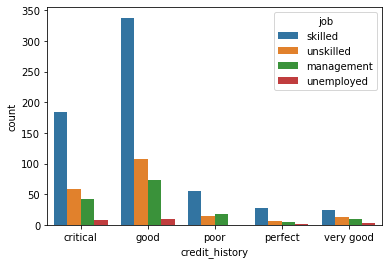

In [251]:
sns.countplot(x = "credit_history",hue = "job",data = df)

<AxesSubplot:>

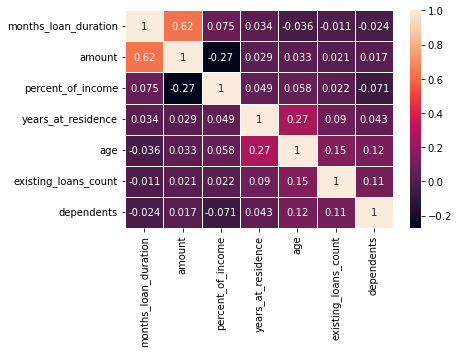

In [252]:
correlation_mat = df.corr()   # for correlation
sns.heatmap(correlation_mat,annot = True,linewidths = .7 )

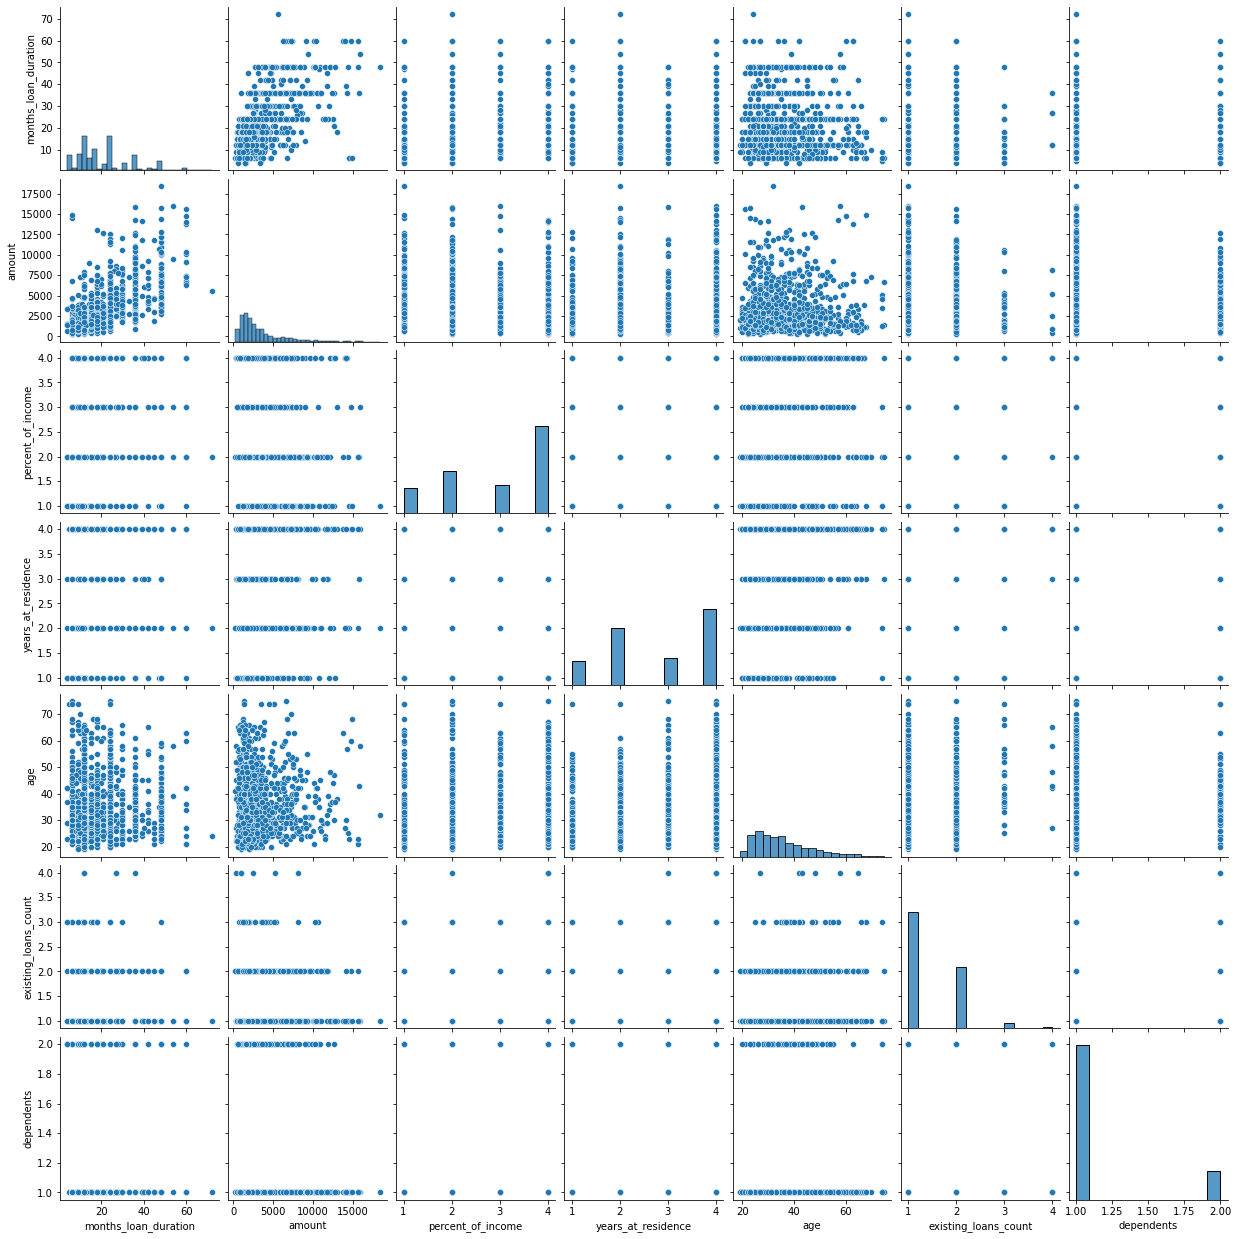

In [253]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

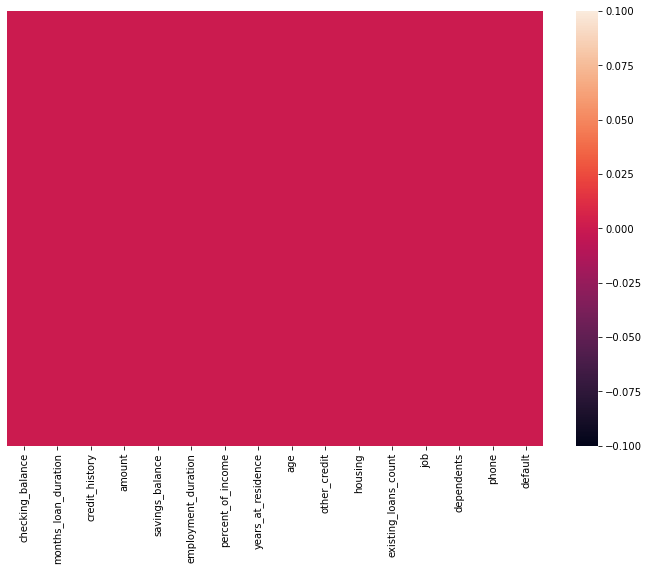

In [254]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False)    # plane figure so no missing values

In [255]:
df

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [256]:
df = pd.get_dummies(data = df,columns = ['checking_balance','credit_history','savings_balance','employment_duration','other_credit','job','housing','dependents'])
df = df.drop(['phone'],axis = 1)
df

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,...,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled,housing_other,housing_own,housing_rent,dependents_1,dependents_2
0,6,1169,4,4,67,2,no,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,48,5951,2,2,22,1,yes,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,no,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,42,7882,2,4,45,1,no,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,24,4870,3,4,53,2,yes,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,no,0,0,0,...,0,0,0,0,1,0,1,0,1,0
996,30,3857,4,4,40,1,no,0,1,0,...,0,1,0,0,0,0,1,0,1,0
997,12,804,4,4,38,1,no,0,0,0,...,0,0,1,0,0,0,1,0,1,0
998,45,1845,4,4,23,1,yes,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [257]:
y = df['default']
y

0       no
1      yes
2       no
3       no
4      yes
      ... 
995     no
996     no
997     no
998    yes
999     no
Name: default, Length: 1000, dtype: object

In [258]:
x = df.drop(['default'],axis = 1)
x

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled,housing_other,housing_own,housing_rent,dependents_1,dependents_2
0,6,1169,4,4,67,2,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
3,42,7882,2,4,45,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,24,4870,3,4,53,2,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
996,30,3857,4,4,40,1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
997,12,804,4,4,38,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
998,45,1845,4,4,23,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [259]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1)

In [260]:
model = LogisticRegression()
model

LogisticRegression()

In [261]:
model.fit(x_train,y_train)

C:\Users\ujjwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [262]:
model.score(x_train,y_train)

0.7413333333333333

In [263]:
model.score(x_test,y_test)

0.74

<AxesSubplot:>

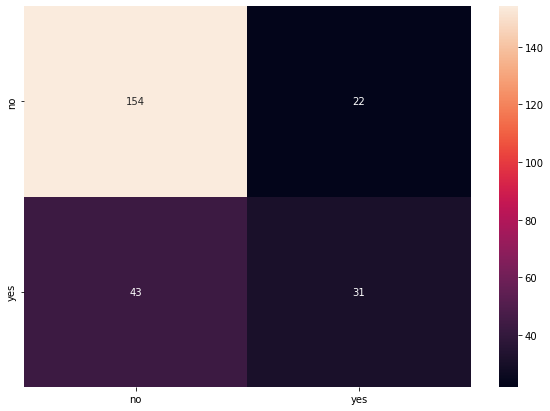

In [264]:
from sklearn import metrics 
y_pred1 = model.predict(x_test)
cm = metrics.confusion_matrix(y_test,y_pred1,labels = ["no","yes"])

df_cm = pd.DataFrame(cm, index = [i for i in ["no","yes"]],
                    columns = [i for i in ["no","yes"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot = True,fmt = 'g')

In [265]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [266]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [267]:
dtree.score(x_train,y_train)

1.0

In [268]:
dtree.score(x_test,y_test)

0.648

In [269]:
dtreenew = DecisionTreeClassifier(criterion = 'gini',splitter = 'random',max_depth = 3,random_state = 4,max_leaf_nodes = 2)
dtreenew.fit(x_train,y_train)
dtreenew.score(x_train,y_train)

0.6986666666666667

In [270]:
dtree.score(x_test,y_test)

0.648

<AxesSubplot:>

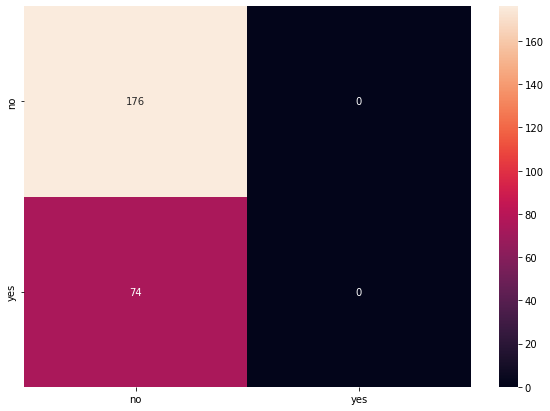

In [271]:
from sklearn import metrics 
y_pred = dtreenew.predict(x_test)
cm = metrics.confusion_matrix(y_test,y_pred,labels = ["no","yes"])

df_cm = pd.DataFrame(cm, index = [i for i in ["no","yes"]],
                    columns = [i for i in ["no","yes"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot = True,fmt = 'g')

In [272]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [273]:
bag.score(x_train,y_train)

0.98

In [274]:
bag.score(x_test,y_test)

0.74

In [275]:
bag1 = BaggingClassifier(n_estimators = 1,n_jobs = 20)

In [276]:
bag1.fit(x_train,y_train)
bag1.score(x_train,y_train)

0.8693333333333333

In [277]:
bag1.score(x_test,y_test)

0.672

In [278]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200,learning_rate = 1.35)
ada.fit(x_train,y_train)
ada.score(x_train,y_train)

0.8373333333333334

In [279]:
ada.score(x_test,y_test)

0.728

In [280]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 15)
grad.fit(x_train,y_train)
grad.score(x_train,y_train)

0.776

In [281]:
grad.score(x_test,y_test)

0.736

In [282]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',max_depth = 3)
forest.fit(x_train,y_train)
forest.score(x_train,y_train)

0.732

In [283]:
forest.score(x_test,y_test)

0.716

<AxesSubplot:>

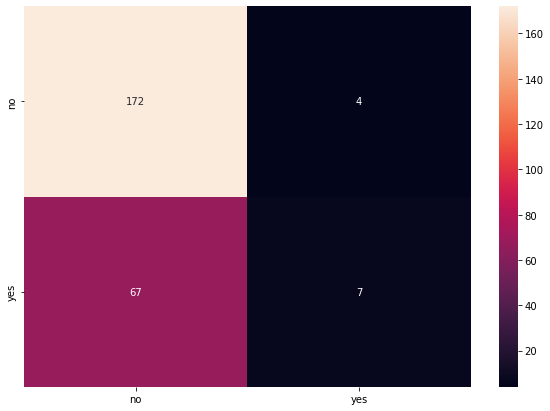

In [284]:
from sklearn import metrics 
y_pred2 = forest.predict(x_test)
cm = metrics.confusion_matrix(y_test,y_pred2,labels = ["no","yes"])

df_cm = pd.DataFrame(cm, index = [i for i in ["no","yes"]],
                    columns = [i for i in ["no","yes"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot = True,fmt = 'g')               

In [285]:
    ################## the RandomForest Classifier is the best for this dataset   ###################

In [286]:
                       ### - by Ujjwal Mathur ####3